**Problem Statement**   
Analytics Vidhya - India ML Hiring Hackathon 2019
.

Loan Delinquency Prediction
Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions. Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.

**Goal**

Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)


In [204]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [205]:
# Importing required packages
import numpy as np
import pandas as pd

### Data Import and Data Understanding

In [206]:
#Importing the data
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [207]:
#Looking at top 5 rows
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [208]:
#Looking at top 5 rows
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [209]:
#looking at data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [210]:
#looking at data types
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null object
financial_institution       35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null object
first_payment_date          35866 non-null object
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3

In [211]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [238]:
### Checking the default Rate
rate = (sum(data['m13'])/len(data['m13'].index))*100
rate

0.5480018611383963

# Data Preparation

In [239]:
#Convering string to date datatype
data[["origination_date"]] = data[["origination_date"]].apply(pd.to_datetime)
data[["first_payment_date"]] = data[["first_payment_date"]].apply(pd.to_datetime)

In [240]:
test[["origination_date"]] = pd.to_datetime(data["origination_date"], dayfirst=True)
test[["first_payment_date"]] = pd.to_datetime(data["first_payment_date"], dayfirst=True)

In [241]:
#calculating the number of days between origintaion date and 1st paymnet as days taken for 1st paymnet
import datetime
data["days_taken_for_1st_payment"] = (data.first_payment_date - data.origination_date).astype('timedelta64[D]')

In [242]:
test["days_taken_for_1st_payment"] = (test.first_payment_date - test.origination_date).astype('timedelta64[D]')

In [243]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m5,m6,m7,m8,m9,m10,m11,m12,m13,days_taken_for_1st_payment
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,...,0,0,1,0,0,0,0,0,1,61.0
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,...,0,0,0,0,0,0,1,0,1,60.0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,...,0,0,0,0,0,0,0,0,1,60.0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,...,0,0,0,0,1,1,1,1,1,60.0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,...,4,5,6,7,8,9,10,11,1,60.0


In [244]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,days_taken_for_1st_payment
0,1,Y,Browning-Hart,3.875,417000,360,2012-03-01,2012-05-01,75,1,...,0,0,0,0,0,0,0,0,0,61.0
1,2,X,OTHER,4.500,113000,360,2012-01-01,2012-03-01,80,2,...,0,0,0,0,0,0,0,0,0,60.0
2,3,Y,OTHER,4.500,72000,360,2012-01-01,2012-03-01,75,1,...,0,0,0,0,0,0,0,0,0,60.0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,2012-02-01,2012-04-01,41,2,...,0,0,0,0,0,0,0,0,0,60.0
4,5,X,Browning-Hart,3.250,166000,180,2012-02-01,2012-04-01,53,2,...,0,0,0,0,0,0,0,0,0,60.0


In [245]:
num_val = ["interest_rate","unpaid_principal_bal","loan_term","loan_to_value","number_of_borrowers","debt_to_income_ratio","borrower_credit_score",
                "insurance_percent","co-borrower_credit_score","days_taken_for_1st_payment"]

In [246]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,days_taken_for_1st_payment
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,60.331593
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,7.291581
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,29.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,60.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,60.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,60.000000
90%,4.375000,3.840000e+05,360.000000,85.000000,2.000000,43.000000,809.000000,12.000000,806.000000,61.000000
95%,4.625000,4.170000e+05,360.000000,92.000000,2.000000,45.000000,814.000000,25.000000,812.000000,61.000000
99%,5.000000,5.540000e+05,360.000000,95.000000,2.000000,49.000000,820.000000,30.000000,819.000000,91.000000


In [247]:
#Checking values of categorical attributes
cat_val = ["source", "financial_institution", "loan_purpose"]
for col in cat_val:
    print ([col]," : ",data[col].unique())

['source']  :  ['Z' 'Y' 'X']
['financial_institution']  :  ['Turner, Baldwin and Rhodes' 'Swanson, Newton and Miller'
 'Thornton-Davis' 'OTHER' 'Browning-Hart' 'Richardson Ltd'
 'Edwards-Hoffman' 'Richards-Walters' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Anderson-Taylor'
 'Taylor, Hunt and Rodriguez' 'Nicholson Group' 'Cole, Brooks and Vincent'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Romero, Woods and Johnson' 'Chapman-Mcmahon']
['loan_purpose']  :  ['C86' 'B12' 'A23']


In [248]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[["source", "financial_institution", "loan_purpose"]])
dummy2= pd.get_dummies(test[["source", "financial_institution", "loan_purpose"]])
#from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
#df_categorical = data.select_dtypes(include=['object'])
#df_categorical.head()

# Adding the results to the master dataframe
new_data = pd.concat([data, dummy1], axis=1)
new_test = pd.concat([test, dummy2], axis=1)

In [249]:
new_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,...,0,0,0,0,0,0,1,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,...,0,0,0,1,0,0,0,0,1,0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,...,0,0,0,0,0,1,0,0,1,0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,...,0,0,0,0,0,0,0,0,1,0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,...,0,0,0,0,0,0,0,0,0,1


In [250]:
new_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,1,Y,Browning-Hart,3.875,417000,360,2012-03-01,2012-05-01,75,1,...,0,0,0,0,0,0,0,1,0,0
1,2,X,OTHER,4.500,113000,360,2012-01-01,2012-03-01,80,2,...,0,0,0,0,0,0,0,0,0,1
2,3,Y,OTHER,4.500,72000,360,2012-01-01,2012-03-01,75,1,...,0,0,0,0,0,0,0,0,0,1
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,2012-02-01,2012-04-01,41,2,...,0,0,0,0,0,0,0,1,0,0
4,5,X,Browning-Hart,3.250,166000,180,2012-02-01,2012-04-01,53,2,...,0,0,0,0,0,0,0,1,0,0


In [251]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 55 columns):
loan_id                                              116058 non-null int64
source                                               116058 non-null object
financial_institution                                116058 non-null object
interest_rate                                        116058 non-null float64
unpaid_principal_bal                                 116058 non-null int64
loan_term                                            116058 non-null int64
origination_date                                     116058 non-null datetime64[ns]
first_payment_date                                   116058 non-null datetime64[ns]
loan_to_value                                        116058 non-null int64
number_of_borrowers                                  116058 non-null float64
debt_to_income_ratio                                 116058 non-null float64
borrower_credit_score                 

In [252]:
#Drop the unneccsary columns
new_data = new_data.drop(["loan_id","source", "financial_institution", "loan_purpose","origination_date","first_payment_date"],axis =1)

In [253]:
#Drop the unneccsary columns
new_test = new_test.drop(["loan_id","source", "financial_institution", "loan_purpose","origination_date","first_payment_date"],axis =1)

In [254]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 49 columns):
interest_rate                                        116058 non-null float64
unpaid_principal_bal                                 116058 non-null int64
loan_term                                            116058 non-null int64
loan_to_value                                        116058 non-null int64
number_of_borrowers                                  116058 non-null float64
debt_to_income_ratio                                 116058 non-null float64
borrower_credit_score                                116058 non-null float64
insurance_percent                                    116058 non-null float64
co-borrower_credit_score                             116058 non-null float64
insurance_type                                       116058 non-null float64
m1                                                   116058 non-null int64
m2                                                

In [255]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 48 columns):
interest_rate                                        35866 non-null float64
unpaid_principal_bal                                 35866 non-null int64
loan_term                                            35866 non-null int64
loan_to_value                                        35866 non-null int64
number_of_borrowers                                  35866 non-null int64
debt_to_income_ratio                                 35866 non-null int64
borrower_credit_score                                35866 non-null int64
insurance_percent                                    35866 non-null int64
co-borrower_credit_score                             35866 non-null int64
insurance_type                                       35866 non-null int64
m1                                                   35866 non-null int64
m2                                                   35866 non-null int64
m

In [256]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
new_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,...,0.007350,0.010279,0.015423,0.059229,0.010848,0.005609,0.015906,0.503731,0.253175,0.243094
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,...,0.085416,0.100865,0.123230,0.236054,0.103588,0.074685,0.125112,0.499988,0.434832,0.428953
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
90%,4.375000,3.840000e+05,360.000000,85.000000,2.000000,43.000000,809.000000,12.000000,806.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
95%,4.625000,4.170000e+05,360.000000,92.000000,2.000000,45.000000,814.000000,25.000000,812.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
99%,5.000000,5.540000e+05,360.000000,95.000000,2.000000,49.000000,820.000000,30.000000,819.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000


**Test Train Split**

from sklearn.model_selection import train_test_split

In [257]:
# Putting feature variable to X
X = new_data.drop(["m13"], axis=1)

X.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [258]:
# Putting response variable to y
y = new_data['m13']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: m13, dtype: int64

In [259]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
scaler = StandardScaler()

X_train[num_val] = scaler.fit_transform(X_train[num_val])

X_train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
49069,-1.336989,-0.908496,-1.247067,-0.025183,0.827893,0.131003,-1.178221,-0.343287,0.775698,0.0,...,0,1,0,0,0,0,0,1,0,0
3183,-2.147840,0.083602,-1.247067,-2.051572,0.827893,-1.100884,0.521073,-0.343287,0.854249,0.0,...,0,0,0,0,0,0,0,0,1,0
106639,0.284713,1.763207,0.755647,0.669578,0.827893,0.952261,-0.352175,-0.343287,0.799263,0.0,...,0,0,0,0,0,0,0,1,0,0
30581,-2.147840,-1.021630,-1.247067,-2.051572,0.827893,-0.587598,0.875092,-0.343287,0.812355,0.0,...,0,1,0,0,0,0,0,1,0,0
897,1.095564,0.205439,0.755647,-2.051572,0.827893,-0.279626,0.969498,-0.343287,0.864722,0.0,...,0,0,0,0,0,0,0,1,0,0


In [262]:
new_test[num_val] = scaler.fit_transform(new_test[num_val])

In [263]:
new_test.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,0.004669,1.826422,0.748843,0.441346,-1.216630,-1.106607,0.480468,-0.339942,-1.212759,0,...,0,0,0,0,0,0,0,1,0,0
1,1.361798,-0.827206,0.748843,0.731259,0.821943,0.230015,0.552274,-0.339942,0.843313,0,...,0,0,0,0,0,0,0,0,0,1
2,1.361798,-1.185097,0.748843,0.441346,-1.216630,0.332833,-1.434366,-0.339942,-1.212759,0,...,0,0,0,0,0,0,0,0,0,1
3,0.547520,-0.739916,-1.266889,-1.530069,0.821943,-0.695338,0.671951,-0.339942,0.919367,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.352460,-0.364567,-1.266889,-0.834276,0.821943,-1.929143,-0.070047,-0.339942,0.801352,0,...,0,0,0,0,0,0,0,1,0,0


In [264]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

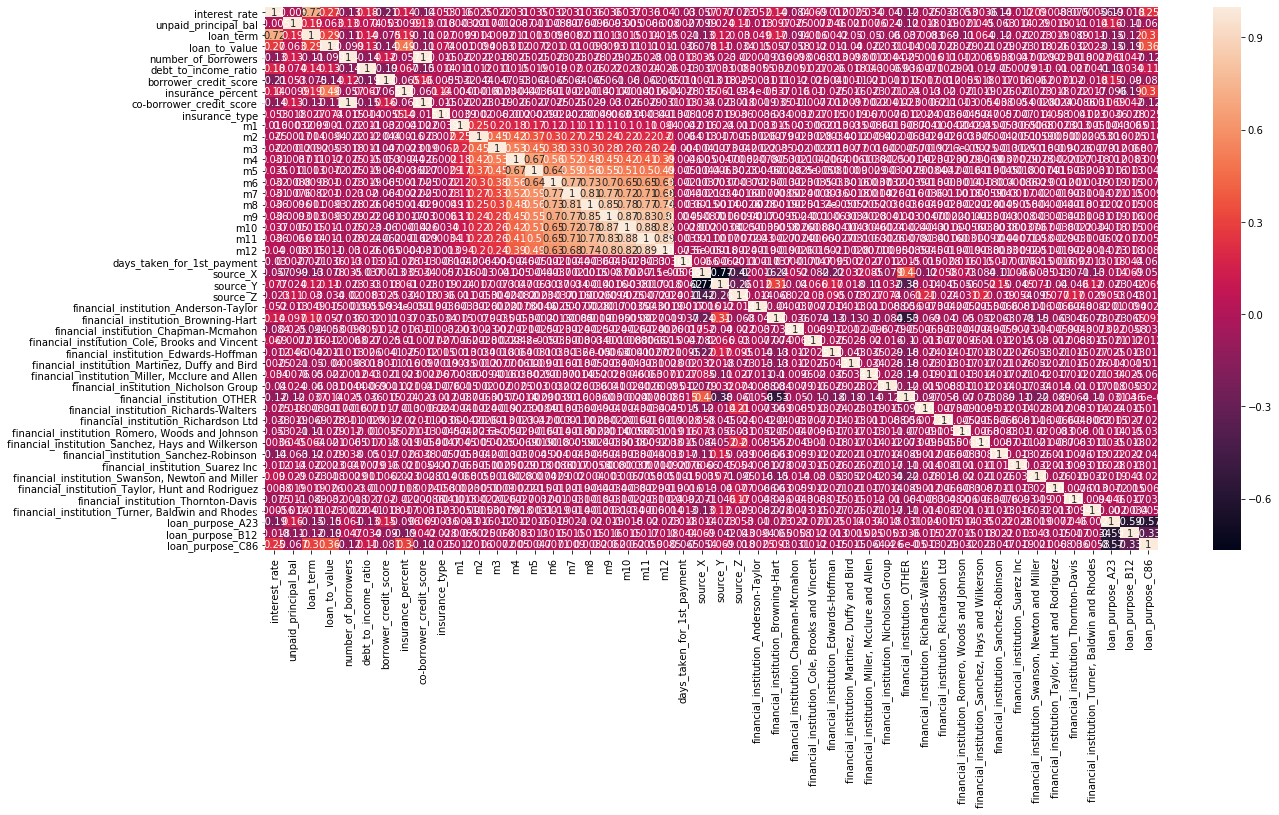

In [266]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Model Building

In [267]:
import statsmodels.api as sm

In [268]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    m13   No. Observations:                81240
Model:                            GLM   Df Residuals:                    81194
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 31 Aug 2019   Deviance:                          nan
Time:                        14:37:39   Pearson chi2:                 4.50e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -6449.6206   1.25e+05     -0.051      0.959   -2.52e+05    2.39e+05
interest_rate                                         0.3586      0.077      4.656      0.000       0.208       0.510
unpaid_principal_bal                                 -0.1205      0.070     -1.725      0.084      -0.257       0.016
loan_term                                            -0.1075      0.095     -1.128      0.259      -0.294       0.079
loan_to_value                                         0.0506      0.084      0.604      0.546      -0.114       0.215
number_of_borrowers                                   0.3717      0.419      0.887      0.375      -0.450       1.193
debt_to_income_ratio                                  0.3820      0.069      5.525      0.000       0.246       0.517
borrower_credit_score                                -0.2339      0.027     -8.708      0.000      -0.287      -0.181
insurance_percent                                     0.0366      0.065      0.561      0.575      -0.091       0.164
co-borrower_credit_score                             -0.6404      0.434     -1.474      0.140      -1.492       0.211
insurance_type                                        1.5679      0.500      3.135      0.002       0.588       2.548
m1                                                    0.8652      0.393      2.200      0.028       0.094       1.636
m2                                                    0.5790      0.530      1.093      0.274      -0.459       1.617
m3                                                   -0.9863      0.629     -1.567      0.117      -2.220       0.247
m4                                                    1.4377      0.465      3.091      0.002       0.526       2.349
m5                                                   -0.1542      0.341     -0.453      0.651      -0.822       0.514
m6                                                    0.0936      0.410      0.228      0.819      -0.710       0.897
m7                                                    0.4349      0.399      1.090      0.276      -0.347       1.217
m8                                                    0.2576      0.357      0.722      0.470      -0.441       0.957
m9                                                    0.9564      0.317      3.014      0.003       0.334       1.578
m10                                                   0.6745      0.264      2.550      0.011       0.156       1.193
m11                                                   0.6598      0.244      2.707      0.007       0.182       1.137
m12                                                   4.2195      0.177     23.790      0.000       3.872       4.567
days_taken_for_

In [269]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [270]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [271]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('interest_rate', False, 11),
 ('unpaid_principal_bal', False, 20),
 ('loan_term', False, 27),
 ('loan_to_value', False, 29),
 ('number_of_borrowers', True, 1),
 ('debt_to_income_ratio', False, 13),
 ('borrower_credit_score', False, 16),
 ('insurance_percent', False, 30),
 ('co-borrower_credit_score', True, 1),
 ('insurance_type', True, 1),
 ('m1', True, 1),
 ('m2', False, 8),
 ('m3', False, 7),
 ('m4', True, 1),
 ('m5', False, 31),
 ('m6', False, 28),
 ('m7', False, 3),
 ('m8', False, 9),
 ('m9', True, 1),
 ('m10', True, 1),
 ('m11', False, 2),
 ('m12', True, 1),
 ('days_taken_for_1st_payment', False, 32),
 ('source_X', True, 1),
 ('source_Y', True, 1),
 ('source_Z', True, 1),
 ('financial_institution_Anderson-Taylor', False, 34),
 ('financial_institution_Browning-Hart', False, 18),
 ('financial_institution_Chapman-Mcmahon', False, 14),
 ('financial_institution_Cole, Brooks and Vincent', False, 6),
 ('financial_institution_Edwards-Hoffman', False, 5),
 ('financial_institution_Martine

In [282]:
col = X_train.columns[rfe.support_]

In [283]:
X_train.columns[~rfe.support_]

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent',
       'm2', 'm3', 'm5', 'm6', 'm7', 'm8', 'm11', 'days_taken_for_1st_payment',
       'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and Wilkerson',
       'financial_institution_Sanchez-Robinson',
       'financial_institution_Suarez Inc',
       'financial_

In [284]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    m13   No. Observations:                81240
Model:                            GLM   Df Residuals:                    81226
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 31 Aug 2019   Deviance:                          nan
Time:                        14:40:22   Pearson chi2:                 4.50e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                              6.61e+11   9.71e+12      0.068      0.946   -1.84e+13    1.97e+13
number_of_borrowers                                  1.4873      0.292      5.089      0.000       0.914       2.060
co-borrower_credit_score                            -1.9024      0.300     -6.346      0.000      -2.490      -1.315
insurance_type                                       1.8282      0.461      3.961      0.000       0.924       2.733
m1                                                   1.0827      0.335      3.230      0.001       0.426       1.740
m4                                                   1.4573      0.303      4.816      0.000       0.864       2.050
m9                                                   1.2645      0.254      4.969      0.000       0.766       1.763
m10                                                  1.0713      0.245      4.377      0.000       0.592       1.551
m12                                                  4.6676      0.159     29.320      0.000       4.356       4.980
source_X                                         -8.901e+11   1.31e+13     -0.068      0.946   -2.65e+13    2.47e+13
source_Y                                         -8.901e+11   1.31e+13     -0.068      0.946   -2.65e+13    2.47e+13
source_Z                                         -8.901e+11   1.31e+13     -0.068      0.946   -2.65e+13    2.47e+13
financial_institution_Taylor, Hunt and Rodriguez    -1.8145      1.055     -1.719      0.086      -3.883       0.254
loan_purpose_A23                                  2.291e+11   3.37e+12      0.068      0.946   -6.37e+12    6.83e+12
loan_purpose_B12                                  2.291e+11   3.37e+12      0.068      0.946   -6.37e+12    6.83e+12
loan_purpose_C86                                  2.291e+11   3.37e+12      0.068      0.946   -6.37e+12    6.83e+12
====================================================================================================================
"""

In [287]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

49069     0.001598
3183      0.002124
106639    0.001287
30581     0.001491
897       0.001136
109127    0.001076
28144     0.001103
19189     0.279521
41725     0.002265
57278     0.001200
dtype: float64

In [288]:
y_train_pred_final = pd.DataFrame({'default':y_train.values, 'default_Prob':y_train_pred})
y_train_pred_final.head()

,default,default_Prob
49069,0,0.001598
3183,0,0.002124
106639,0,0.001287
30581,0,0.001491
897,0,0.001136


In [289]:
y_train_pred_final['predicted'] = y_train_pred_final.default.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,default,default_Prob,predicted
49069,0,0.001598,0
3183,0,0.002124,0
106639,0,0.001287,0
30581,0,0.001491,0
897,0,0.001136,0


In [290]:
from sklearn import metrics

In [291]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.default, y_train_pred_final.predicted )
print(confusion)

[[80790     0]
 [    0   450]]


In [292]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.default, y_train_pred_final.predicted))

1.0


In [293]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [294]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,source_X,inf
9,source_Y,inf
10,source_Z,inf
12,loan_purpose_A23,inf
13,loan_purpose_B12,inf
14,loan_purpose_C86,inf
1,co-borrower_credit_score,146.12
0,number_of_borrowers,145.40
6,m10,4.96
5,m9,4.51


In [295]:
col = col.drop('source_X', 1)
col

Index(['number_of_borrowers', 'co-borrower_credit_score', 'insurance_type',
       'm1', 'm4', 'm9', 'm10', 'm12', 'source_Y', 'source_Z',
       'financial_institution_Taylor, Hunt and Rodriguez', 'loan_purpose_A23',
       'loan_purpose_B12', 'loan_purpose_C86'],
      dtype='object')

In [296]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,co-borrower_credit_score,146.19
0,number_of_borrowers,146.08
6,m10,4.96
5,m9,4.51
7,m12,3.45
11,loan_purpose_A23,1.44
4,m4,1.29
13,loan_purpose_C86,1.26
12,loan_purpose_B12,1.17
8,source_Y,1.08


In [297]:
col = col.drop('co-borrower_credit_score', 1)
col

Index(['number_of_borrowers', 'insurance_type', 'm1', 'm4', 'm9', 'm10', 'm12',
       'source_Y', 'source_Z',
       'financial_institution_Taylor, Hunt and Rodriguez', 'loan_purpose_A23',
       'loan_purpose_B12', 'loan_purpose_C86'],
      dtype='object')

In [298]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,m10,4.96
4,m9,4.51
6,m12,3.45
10,loan_purpose_A23,1.44
3,m4,1.29
12,loan_purpose_C86,1.26
11,loan_purpose_B12,1.16
7,source_Y,1.08
8,source_Z,1.08
2,m1,1.04


In [299]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    m13   No. Observations:                81240
Model:                            GLM   Df Residuals:                    81227
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 31 Aug 2019   Deviance:                          nan
Time:                        14:44:26   Pearson chi2:                 4.50e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -7.084e+11   8.91e+12     -0.080      0.937   -1.82e+13    1.67e+13
number_of_borrowers                                 -0.3683      0.060     -6.118      0.000      -0.486      -0.250
insurance_type                                       1.8180      0.471      3.856      0.000       0.894       2.742
m1                                                   1.0829      0.341      3.172      0.002       0.414       1.752
m4                                                   1.5248      0.303      5.025      0.000       0.930       2.120
m9                                                   1.2874      0.257      5.011      0.000       0.784       1.791
m10                                                  1.1066      0.248      4.469      0.000       0.621       1.592
m12                                                  4.7047      0.159     29.503      0.000       4.392       5.017
source_Y                                             0.1772      0.129      1.373      0.170      -0.076       0.430
source_Z                                             0.2141      0.182      1.174      0.240      -0.143       0.572
financial_institution_Taylor, Hunt and Rodriguez    -1.8506      1.075     -1.721      0.085      -3.958       0.257
loan_purpose_A23                                  7.084e+11   8.91e+12      0.080      0.937   -1.67e+13    1.82e+13
loan_purpose_B12                                  7.084e+11   8.91e+12      0.080      0.937   -1.67e+13    1.82e+13
loan_purpose_C86                                  7.084e+11   8.91e+12      0.080      0.937   -1.67e+13    1.82e+13
====================================================================================================================
"""

In [300]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [301]:
y_train_pred[:10]

array([0.0014517 , 0.00218964, 0.00121634, 0.0014517 , 0.00121634,
       0.00121634, 0.00121634, 0.19511438, 0.00218964, 0.00121634])

In [302]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [303]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,default,default_Prob,predicted,Churn_Prob
49069,0,0.001598,0,0.001452
3183,0,0.002124,0,0.002190
106639,0,0.001287,0,0.001216
30581,0,0.001491,0,0.001452
897,0,0.001136,0,0.001216


In [304]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.default, y_train_pred_final.predicted))

0.9959010339734121


In [305]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,m10,4.96
4,m9,4.51
6,m12,3.45
10,loan_purpose_A23,1.44
3,m4,1.29
12,loan_purpose_C86,1.26
11,loan_purpose_B12,1.16
7,source_Y,1.08
8,source_Z,1.08
2,m1,1.04


In [306]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.default, y_train_pred_final.predicted )
confusion

array([[80763,    27],
       [  306,   144]], dtype=int64)

In [307]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
FN

306

In [308]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.32

In [309]:
# Let us calculate specificity
TN / float(TN+FP)

0.9996658002227998

In [310]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0003341997772001485


In [311]:
# positive predictive value 
print (TP / float(TP+FP))

0.8421052631578947


In [312]:
# Negative predictive value
print (TN / float(TN+ FN))

0.996225437590201


In [313]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [314]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.default, y_train_pred_final.default_Prob, drop_intermediate = False )

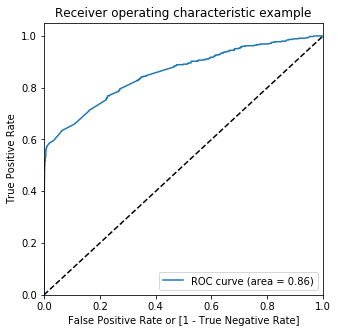

In [315]:
draw_roc(y_train_pred_final.default, y_train_pred_final.default_Prob)

In [316]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,default,default_Prob,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
49069,0,0.001598,0,0.001452,1,0,0,0,0,0,0,0,0,0
3183,0,0.002124,0,0.002190,1,0,0,0,0,0,0,0,0,0
106639,0,0.001287,0,0.001216,1,0,0,0,0,0,0,0,0,0
30581,0,0.001491,0,0.001452,1,0,0,0,0,0,0,0,0,0
897,0,0.001136,0,0.001216,1,0,0,0,0,0,0,0,0,0


In [323]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.005539  1.000000  0.000000
0.1   0.1  0.995187  0.488889  0.998007
0.2   0.2  0.995581  0.460000  0.998564
0.3   0.3  0.995815  0.420000  0.999022
0.4   0.4  0.995901  0.333333  0.999592
0.5   0.5  0.995938  0.324444  0.999678
0.6   0.6  0.996012  0.315556  0.999802
0.7   0.7  0.995938  0.286667  0.999889
0.8   0.8  0.995901  0.277778  0.999901
0.9   0.9  0.995778  0.255556  0.999901


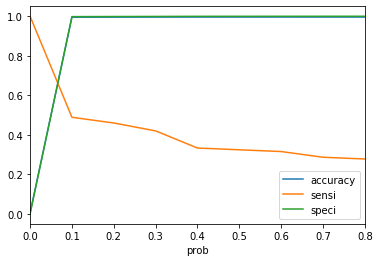

In [322]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [324]:
y_train_pred_final['final_predicted'] = y_train_pred_final.default_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,default,default_Prob,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
49069,0,0.001598,0,0.001452,1,0,0,0,0,0,0,0,0,0,0
3183,0,0.002124,0,0.002190,1,0,0,0,0,0,0,0,0,0,0
106639,0,0.001287,0,0.001216,1,0,0,0,0,0,0,0,0,0,0
30581,0,0.001491,0,0.001452,1,0,0,0,0,0,0,0,0,0,0
897,0,0.001136,0,0.001216,1,0,0,0,0,0,0,0,0,0,0


In [325]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.default, y_train_pred_final.final_predicted)

0.9951870999507632

In [326]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.default, y_train_pred_final.final_predicted )
confusion2

array([[80629,   161],
       [  230,   220]], dtype=int64)

In [327]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [328]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8421052631578947

In [329]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.32

In [330]:
from sklearn.metrics import precision_score, recall_score

In [331]:
precision_score(y_train_pred_final.default, y_train_pred_final.predicted)

0.8421052631578947

In [332]:
recall_score(y_train_pred_final.default, y_train_pred_final.predicted)

0.32

In [333]:
from sklearn.metrics import precision_recall_curve

In [334]:
y_train_pred_final.default, y_train_pred_final.predicted

(49069     0
 3183      0
 106639    0
 30581     0
 897       0
 109127    0
 28144     0
 19189     0
 41725     0
 57278     0
 98097     0
 6516      0
 16965     0
 80899     0
 11319     0
 69173     0
 95971     0
 52255     0
 40870     0
 72351     0
 67550     0
 12908     0
 16322     0
 106145    0
 19877     0
 54952     0
 43218     0
 55576     0
 25895     0
 113514    0
          ..
 71323     0
 84354     0
 6230      0
 80989     0
 38537     0
 42491     0
 109456    0
 7738      0
 17724     0
 59243     0
 109796    0
 91791     0
 86296     0
 109296    0
 78833     0
 49954     0
 71182     0
 106210    0
 13890     0
 20533     0
 75618     0
 14260     0
 82270     0
 63370     0
 81840     0
 65615     0
 77655     0
 79683     0
 56088     0
 38408     0
 Name: default, Length: 81240, dtype: int64, 49069     0
 3183      0
 106639    0
 30581     0
 897       0
 109127    0
 28144     0
 19189     0
 41725     0
 57278     0
 98097     0
 6516      0
 16965 

In [335]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.default, y_train_pred_final.default_Prob)

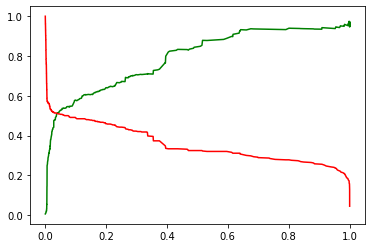

In [336]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [337]:
X_test[num_val] = scaler.transform(X_test[num_val])

In [338]:
X_test = X_test[col]
X_test.head()

,number_of_borrowers,insurance_type,m1,m4,m9,m10,m12,source_Y,source_Z,"financial_institution_Taylor, Hunt and Rodriguez",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
45273,0.821943,0.0,0,0,0,0,0,1,0,0,1,0,0
6110,-1.216630,0.0,0,0,0,0,0,0,0,0,0,1,0
49569,0.821943,0.0,0,0,0,0,0,1,0,0,0,1,0
100356,0.821943,0.0,0,0,0,0,0,0,0,0,0,1,0
11250,0.821943,0.0,0,0,0,0,0,1,0,0,1,0,0


In [339]:
X_test_sm = sm.add_constant(X_test)

In [340]:
y_test_pred = res.predict(X_test_sm)

In [341]:
y_test_pred[:10]

45273     0.001455
6110      0.004638
49569     0.002619
100356    0.002194
11250     0.001455
67558     0.001455
23454     0.002619
7970      0.002807
48464     0.002579
84873     0.001219
dtype: float64

In [342]:
# Converting y_pred to a dataframe which is an array
y_pred_final = pd.DataFrame(y_test_pred)

In [343]:
# Let's see the head
y_pred_final.head()

,0
45273,0.001455
6110,0.004638
49569,0.002619
100356,0.002194
11250,0.001455


In [344]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'default_Prob'})

In [345]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [346]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_final],axis=1)

In [347]:
y_pred_final.head()

,m13,default_Prob
45273,0,0.001455
6110,0,0.004638
49569,0,0.002619
100356,0,0.002194
11250,0,0.001455


In [348]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 'm13' : 'default'})

In [349]:
# Let's see the head of y_pred_final
y_pred_final.head()

,default,default_Prob
45273,0,0.001455
6110,0,0.004638
49569,0,0.002619
100356,0,0.002194
11250,0,0.001455


In [350]:
y_pred_final['final_predicted'] = y_pred_final.default_Prob.map(lambda x: 1 if x > 0.07 else 0)

In [351]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.default, y_pred_final.final_predicted)

0.9953185134126027

In [352]:
confusion2 = metrics.confusion_matrix(y_pred_final.default, y_pred_final.final_predicted )
confusion2

array([[34562,    70],
       [   93,    93]], dtype=int64)

In [353]:
precision = precision_score(y_pred_final.default, y_pred_final.final_predicted)
precision

0.5705521472392638

In [354]:
recall =recall_score(y_pred_final.default, y_pred_final.final_predicted)
recall

0.5

In [355]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.5329512893982808

### Prediction

In [356]:
new_test = new_test[col]
new_test.head()

,number_of_borrowers,insurance_type,m1,m4,m9,m10,m12,source_Y,source_Z,"financial_institution_Taylor, Hunt and Rodriguez",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,-1.216630,0,0,0,0,0,0,1,0,0,1,0,0
1,0.821943,0,0,0,0,0,0,0,0,0,0,0,1
2,-1.216630,0,0,0,0,0,0,1,0,0,0,0,1
3,0.821943,0,0,0,0,0,0,0,0,0,1,0,0
4,0.821943,0,0,0,0,0,0,0,0,0,1,0,0


In [357]:
new_test_sm = sm.add_constant(new_test)

In [358]:
new_test_pred = res.predict(new_test_sm)

In [359]:
new_test_pred[:10]

0    0.003077
1    0.002353
2    0.005929
3    0.001219
4    0.001219
5    0.002807
6    0.001219
7    0.002194
8    0.001219
9    0.006151
dtype: float64

In [360]:
# Converting y_pred to a dataframe which is an array
new_pred_final = pd.DataFrame(new_test_pred)

In [361]:
new_pred_final

,0
0,0.003077
1,0.002353
2,0.005929
3,0.001219
4,0.001219
5,0.002807
6,0.001219
7,0.002194
8,0.001219
9,0.006151


In [362]:
# Renaming the column 
new_pred_final= new_pred_final.rename(columns={ 0 : 'default_Prob'})

In [363]:
new_pred_final['m13'] = new_pred_final.default_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [364]:
new_pred_final.head()

,default_Prob,m13
0,0.003077,0
1,0.002353,0
2,0.005929,0
3,0.001219,0
4,0.001219,0


In [365]:
new_pred_final.index += 1

In [366]:
df= new_pred_final['m13']
df

1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
        ..
35837    0
35838    0
35839    0
35840    0
35841    0
35842    0
35843    0
35844    0
35845    0
35846    0
35847    0
35848    0
35849    0
35850    0
35851    0
35852    0
35853    0
35854    0
35855    0
35856    0
35857    0
35858    0
35859    0
35860    0
35861    0
35862    0
35863    0
35864    0
35865    0
35866    0
Name: m13, Length: 35866, dtype: int64

In [367]:
#Writing the results to a csv file
df.to_csv(r'C:\Users\SuravaramSeshagiriRa\Desktop\Analytics\submit3.csv')